### ANÁLISIS DE VALIDACIÓN Y OPTIMIZACIÓN DEL AGENTE

- Juan Miguel Dimate
- Andrea Forero
- Juan David Sánchez


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from pathlib import Path
from connect4.policy import Policy
from connect4.utils import find_importable_classes
from connect4.connect_state import ConnectState
from tournament import play

In [2]:
participants = find_importable_classes("groups", Policy)

players = list(participants.items())

num_games = 50
seed = 911 

my_agent = "Cuarta versión"  
opponent = "Group A"  

In [3]:
def play_multiple_games(agent1_name, agent2_name, n_games, red=True, seedb=911):
    results = []

    agent1  = None
    agent2 = None
    for name, policy in players:
        if name == agent1_name:
            agent1  = (name, policy)
        if name == agent2_name:
            agent2 = (name, policy)

    
    for i in range(n_games):
        if (i + 1) % 10 == 0:
            print(f"   Game {i+1}/{n_games}...")
        
        if red:
            distribucion = 1.0
        else:
            distribucion = 0.0
        
        winner = play(agent1, agent2, best_of=1, 
                     first_player_distribution=distribucion, 
                     seed=seedb + i)
        
       
        winner_name = winner[0]
        
        if winner_name == agent1_name:
            won = 1
        else:
            won = 0
        
        results.append(won)

    
    return results


#### Jugar como Rojo

In [4]:
# Pusimos a jugar al nuestro como rojo
print("Red")

results_red= play_multiple_games(
    my_agent, 
    opponent, 
    num_games, 
    red=True, 
    seedb=seed
)

wins_red = sum(results_red)
print("Wins:", wins_red, "/", num_games)
winrate = (wins_red / num_games) * 100
print("Win rate:", winrate, "%")



Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 50 / 50
Win rate: 100.0 %


#### Jugar como Amarillo

In [5]:
# Pusimos a jugar al nuestro como amarillo

print("Yellow")

results_yellow = play_multiple_games(
    my_agent, 
    opponent, 
    num_games, 
    red=False, 
    seedb=seed + 1000
)

wins_yellow = sum(results_yellow)
print("Wins:", wins_yellow, "/", num_games)
winrate = (wins_yellow / num_games) * 100
print("Win rate:", winrate, "%")

Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 46 / 50
Win rate: 92.0 %


#### Curva de aprendizaje básica

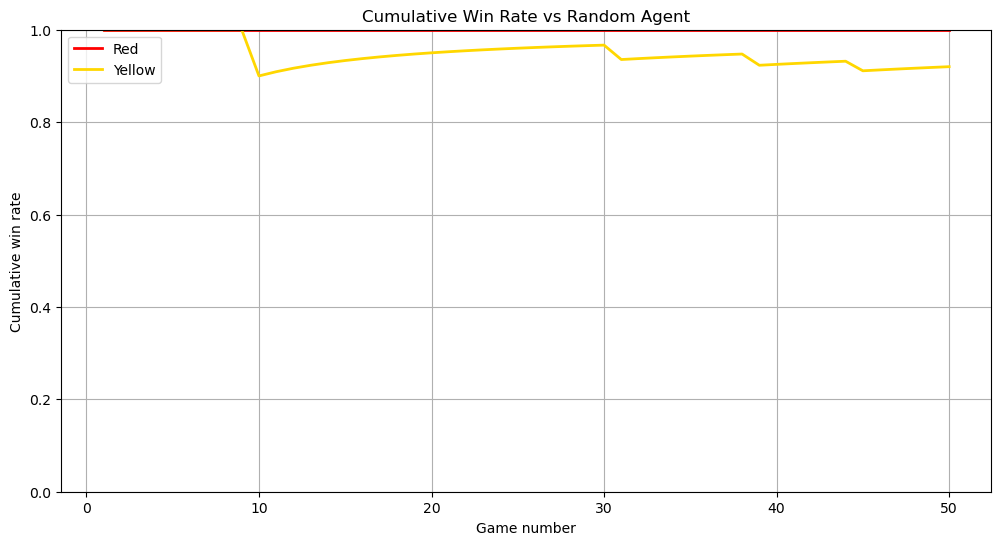

In [6]:
winrate_acum_rojo = []
winrate_acum_amarillo = []

# Para rojo
for i in range(len(results_red)):
    victorias = 0
    for j in range(i+1):
        if results_red[j] == 1:
            victorias = victorias + 1
    
    wr = victorias / (i+1)
    winrate_acum_rojo.append(wr)

# Para amarillo
for i in range(len(results_yellow)):
    victorias = 0
    for j in range(i+1):
        if results_yellow[j] == 1:
            victorias = victorias + 1
    
    wr = victorias / (i+1)
    winrate_acum_amarillo.append(wr)


plt.figure(figsize=(12, 6))

x_axis = []
for i in range(1, num_games+1):
    x_axis.append(i)

plt.plot(x_axis, winrate_acum_rojo, label='Red', color='red', linewidth=2)
plt.plot(x_axis, winrate_acum_amarillo, label='Yellow', color='gold', linewidth=2)


plt.xlabel('Game number')
plt.ylabel('Cumulative win rate')
plt.title('Cumulative Win Rate vs Random Agent')
plt.legend()
plt.grid(True)
plt.ylim([0, 1])
plt.show()

#### Múltiples experimentos

In [7]:
num_runs = 3  

all_winrred = []
all_winryellow = []

for run in range(num_runs):
    print("")
    print("Run", run + 1, "/", num_runs)
    seed_run = seed + run * 10000
    
    # Rojo
    print("Red")
    results_red = play_multiple_games(
        my_agent,
        opponent,
        num_games,
        red=True,
        seedb=seed_run)
    
    wins_red = sum(results_red)
    winrate = wins_red / num_games
    print("Wins:", wins_red, "/", num_games, "(", winrate * 100, "% )")

    curva_red = []
    for i in range(len(results_red)):
        victorias = 0
        for j in range(i+1):
            if results_red[j] == 1:
                victorias = victorias + 1
        wr = victorias / (i+1)
        curva_red.append(wr)
    
    all_winrred.append(curva_red)
    
    # Amarillo
    print("Yellow")
    results_yellow = play_multiple_games(
        my_agent,
        opponent,
        num_games,
        red=False,
        seedb=seed_run + 5000)
    
    wins_yellow = sum(results_yellow)
    winratey = wins_yellow / num_games
    print("Wins:", wins_yellow, "/", num_games, "(", winratey * 100, "% )")

    curva_yellow = []
    for i in range(len(results_yellow)):
        victorias = 0
        for j in range(i+1):
            if results_yellow[j] == 1:
                victorias = victorias + 1
        wr = victorias / (i+1)
        curva_yellow.append(wr)
    
    all_winryellow.append(curva_yellow)

all_winrred = np.array(all_winrred)
all_winryellow = np.array(all_winryellow)


mean_red = np.mean(all_winrred, axis=0)
standard_red = np.std(all_winrred, axis=0)

mean_yellow = np.mean(all_winryellow, axis=0)
standard_yellow = np.std(all_winryellow, axis=0)


print("Resultados")
print("Red", mean_red[-1] * 100, "% with standar d ", standard_red[-1] * 100, "%")
print("Yellow", mean_yellow[-1] * 100, "% with standar d", standard_yellow[-1] * 100, "%")


Run 1 / 3
Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 49 / 50 ( 98.0 % )
Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 50 / 50 ( 100.0 % )

Run 2 / 3
Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 49 / 50 ( 98.0 % )
Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 49 / 50 ( 98.0 % )

Run 3 / 3
Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 50 / 50 ( 100.0 % )
Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 49 / 50 ( 98.0 % )
Resultados
Red 98.66666666666667 % with standar d  0.9428090415820642 %
Yellow 98.66666666666667 % with standar d 0.9428090415820642 %


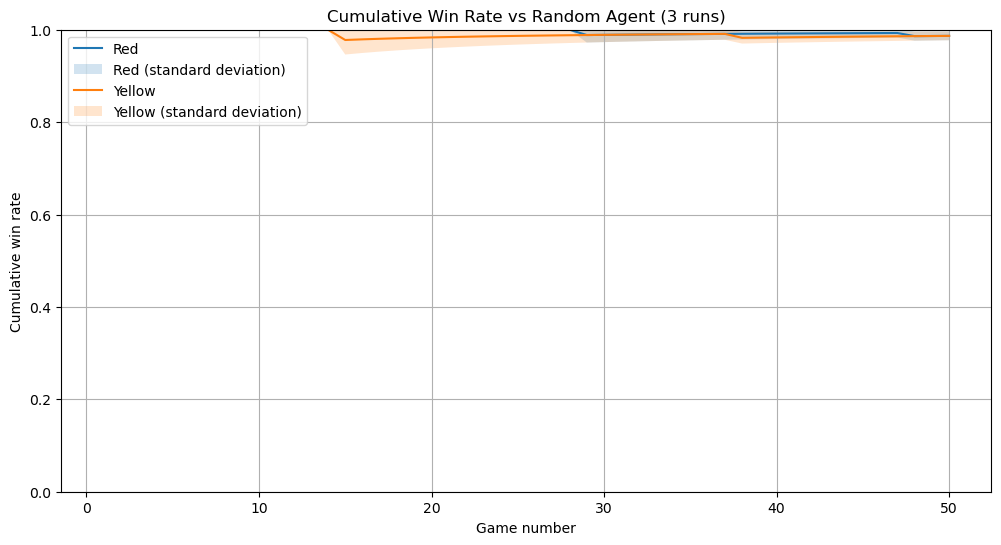

In [8]:
plt.figure(figsize=(12, 6))

x_axis = []
for i in range(1, num_games+1):
    x_axis.append(i)

plt.plot(x_axis, mean_red, label="Red")

plt.fill_between(x_axis, 
                 mean_red - standard_red, 
                 mean_red + standard_red, 
                 label='Red (standard deviation)', alpha=0.2)

plt.plot(x_axis, mean_yellow, label="Yellow")


plt.fill_between(x_axis, 
                 mean_yellow - standard_yellow, 
                 mean_yellow + standard_yellow, 
                 label='Yellow (standard deviation)', alpha=0.2)


plt.xlabel('Game number')
plt.ylabel('Cumulative win rate')

titulo = "Cumulative Win Rate vs Random Agent (" + str(num_runs) + " runs)"
plt.title(titulo)

plt.legend()
plt.grid(True)
plt.ylim([0, 1])
plt.show()

#### Comparación de Versiones

In [9]:
version_1 = "Primera versión"
version_2 = "Cuarta versión"

#### Primera versión

In [10]:
all_winred_v1 = []
all_winyellow_v1 = []

for run in range(num_runs):
    print("")
    print("Run", run + 1, "/", num_runs)
    seed_run = seed + run * 10000
    
    # Rojo
    print("Red")
    results_red = play_multiple_games(
        version_1,
        opponent,
        num_games,
        red=True,
        seedb=seed_run)
    
    wins_red = sum(results_red)
    winrate = wins_red / num_games
    print("Wins:", wins_red, "/", num_games, "(", winrate * 100, "% )")

    curva_red = []
    for i in range(len(results_red)):
        victorias = 0
        for j in range(i+1):
            if results_red[j] == 1:
                victorias = victorias + 1
        wr = victorias / (i+1)
        curva_red.append(wr)
    
    all_winred_v1.append(curva_red)
    
    # Amarillo
    print("Yellow")
    results_yellow = play_multiple_games(
        version_1,
        opponent,
        num_games,
        red=False,
        seedb=seed_run + 5000)
    
    wins_yellow = sum(results_yellow)
    winratey = wins_yellow / num_games
    print("Wins:", wins_yellow, "/", num_games, "(", winratey * 100, "% )")

    curva_yellow = []
    for i in range(len(results_yellow)):
        victorias = 0
        for j in range(i+1):
            if results_yellow[j] == 1:
                victorias = victorias + 1
        wr = victorias / (i+1)
        curva_yellow.append(wr)
    
    all_winyellow_v1.append(curva_yellow)

all_winred_v1 = np.array(all_winred_v1)
all_winyellow_v1 = np.array(all_winyellow_v1)

mean_redv1 = np.mean(all_winred_v1, axis=0)
std_redv1 = np.std(all_winred_v1, axis=0)

mean_yellowv1 = np.mean(all_winyellow_v1, axis=0)
std_yellowv1 = np.std(all_winyellow_v1, axis=0)

print("")
print("Resultados", version_1 + ":")
print("Red", mean_redv1[-1] * 100, "% with standar d", std_redv1[-1] * 100, "%")
print("Yellow", mean_yellowv1[-1] * 100, "% with standar d", std_yellowv1[-1] * 100, "%")


Run 1 / 3
Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 49 / 50 ( 98.0 % )
Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 47 / 50 ( 94.0 % )

Run 2 / 3
Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 47 / 50 ( 94.0 % )
Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 47 / 50 ( 94.0 % )

Run 3 / 3
Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 49 / 50 ( 98.0 % )
Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 47 / 50 ( 94.0 % )

Resultados Primera versión:
Red 96.66666666666667 % with standar d 1.8856180831641285 %
Yellow 94.0 % with standar d 0.0 %


#### Segunda versión

In [11]:
all_winred_v2 = []
all_winyellow_v2 = []

for run in range(num_runs):
    print("")
    print("Run", run + 1, "/", num_runs)
    seed_run = seed + run * 10000
    
    # Rojo
    print("Red")
    results_red = play_multiple_games(
        version_2,
        opponent,
        num_games,
        red=True,
        seedb=seed_run)
    
    wins_red = sum(results_red)
    winrate = wins_red / num_games
    print("Wins:", wins_red, "/", num_games, "(", winrate * 100, "% )")

    curva_red = []
    for i in range(len(results_red)):
        victorias = 0
        for j in range(i+1):
            if results_red[j] == 1:
                victorias = victorias + 1
        wr = victorias / (i+1)
        curva_red.append(wr)
    
    all_winred_v2.append(curva_red)
    
    # Amarillo
    print("Yellow")
    results_yellow = play_multiple_games(
        version_2,
        opponent,
        num_games,
        red=False,
        seedb=seed_run + 5000)
    
    wins_yellow = sum(results_yellow)
    winratey = wins_yellow / num_games
    print("Wins:", wins_yellow, "/", num_games, "(", winratey * 100, "% )")

    curva_yellow = []
    for i in range(len(results_yellow)):
        victorias = 0
        for j in range(i+1):
            if results_yellow[j] == 1:
                victorias = victorias + 1
        wr = victorias / (i+1)
        curva_yellow.append(wr)
    
    all_winyellow_v2.append(curva_yellow)

all_winred_v2 = np.array(all_winred_v2)
all_winyellow_v2 = np.array(all_winyellow_v2)

mean_redv2 = np.mean(all_winred_v2, axis=0)
std_redv2 = np.std(all_winred_v2, axis=0)

mean_yellowv2 = np.mean(all_winyellow_v2, axis=0)
std_yellowv2 = np.std(all_winyellow_v2, axis=0)
print("")
print("Resultados", version_2 + ":")
print("Red", mean_redv2[-1] * 100, "% with standar d", std_redv2[-1] * 100, "%")
print("Yellow", mean_yellowv2[-1] * 100, "% with standar d", std_yellowv2[-1] * 100, "%")


Run 1 / 3
Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 49 / 50 ( 98.0 % )
Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 50 / 50 ( 100.0 % )

Run 2 / 3
Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 50 / 50 ( 100.0 % )
Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 47 / 50 ( 94.0 % )

Run 3 / 3
Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 50 / 50 ( 100.0 % )
Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 49 / 50 ( 98.0 % )

Resultados Cuarta versión:
Red 99.33333333333333 % with standar d 0.9428090415820642 %
Yellow 97.33333333333333 % with standar d 2.4944382578492967 %


#### Comparar versiones

In [12]:
promedio_v1 = (mean_redv1[-1] + mean_yellowv1[-1]) / 2
promedio_v2 = (mean_redv2[-1] + mean_yellowv2[-1]) / 2

print("Version 1", version_1)
print("Red", mean_redv1[-1] * 100, "% with standar d", std_redv1[-1] * 100)
print("Yellow", mean_yellowv1[-1] * 100, "% with standar d", std_yellowv1[-1] * 100)
print("Average", promedio_v1 * 100)

print() 

print("Version 2", version_2)
print("Red", mean_redv2[-1] * 100, "% with standar d", std_redv2[-1] * 100)
print("Yellow", mean_yellowv2[-1] * 100, "% with standar d", std_yellowv2[-1] * 100)
print("Average", promedio_v2 * 100)

if promedio_v2 > promedio_v1:
    print("The best version is", version_2)
else:
    print("The best version is", version_1)

Version 1 Primera versión
Red 96.66666666666667 % with standar d 1.8856180831641285
Yellow 94.0 % with standar d 0.0
Average 95.33333333333334

Version 2 Cuarta versión
Red 99.33333333333333 % with standar d 0.9428090415820642
Yellow 97.33333333333333 % with standar d 2.4944382578492967
Average 98.33333333333333
The best version is Cuarta versión


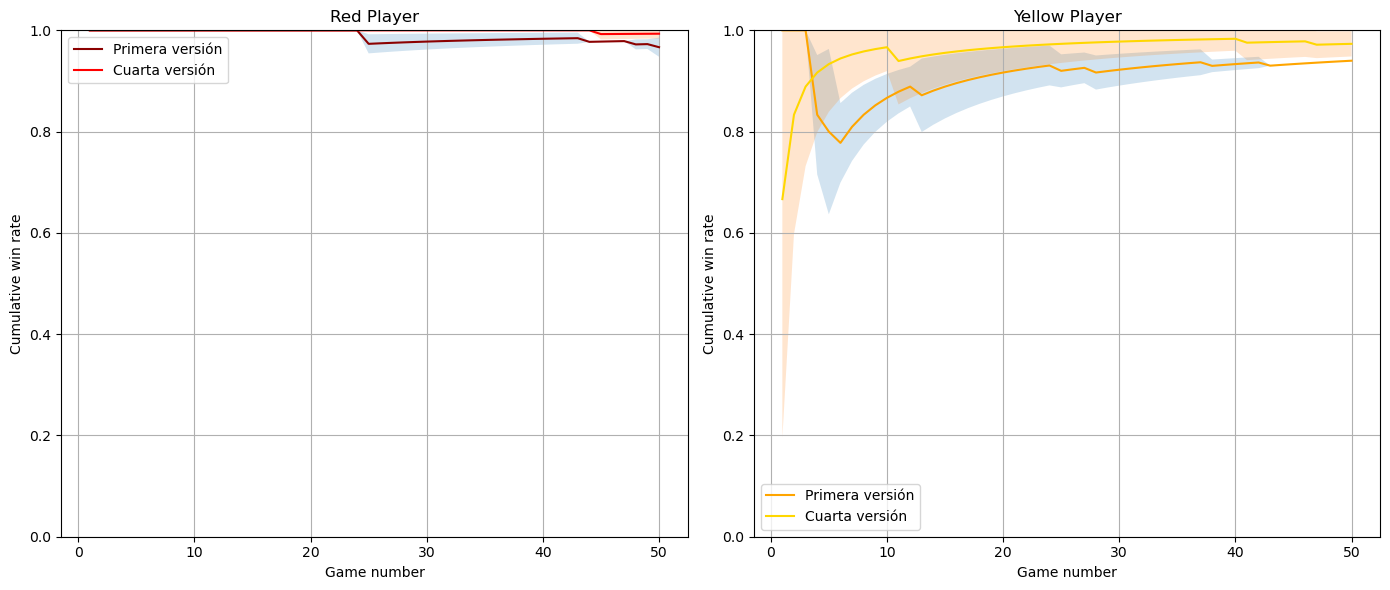

In [13]:
plt.figure(figsize=(14, 6))

#Rojo
plt.subplot(1, 2, 1)
plt.plot(x_axis, mean_redv1, label=version_1, color='darkred')
plt.fill_between(x_axis, 
                 mean_redv1 - std_redv1, 
                 mean_redv1 + std_redv1, alpha=0.2)

plt.plot(x_axis, mean_redv2, label=version_2, color='red')
plt.fill_between(x_axis, 
                 mean_redv2 - std_redv2, 
                 mean_redv2 + std_redv2, alpha=0.2)

plt.xlabel('Game number')
plt.ylabel('Cumulative win rate')
plt.title('Red Player')
plt.legend()
plt.grid(True)
plt.ylim([0, 1])

#Amarillo
plt.subplot(1, 2, 2)
plt.plot(x_axis, mean_yellowv1, label=version_1, color='orange')
plt.fill_between(x_axis, 
                 mean_yellowv1 - std_yellowv1, 
                 mean_yellowv1 + std_yellowv1, alpha=0.2)

plt.plot(x_axis, mean_yellowv2, label=version_2, color='gold')
plt.fill_between(x_axis, 
                 mean_yellowv2 - std_yellowv2, 
                 mean_yellowv2 + std_yellowv2, alpha=0.2)

plt.xlabel('Game number')
plt.ylabel('Cumulative win rate')
plt.title('Yellow Player')
plt.legend()
plt.grid(True)
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

#### Nodos explorados por turno

In [14]:
def play_nodes(agent1_name, agent2_name, red=True, seedb=911):
    agent1 = None
    agent2 = None
    
    for name, policy in players:
        if name == agent1_name:
            agent1 = (name, policy)
        if name == agent2_name:
            agent2 = (name, policy)
    
    if red:
        distribucion = 1.0
    else:
        distribucion = 0.0

    play(agent1, agent2, best_of=1,
         first_player_distribution=distribucion,
         seed=seedb)
    
    nodes_data = agent1[1].last_instance.nodes_explored
    
    return nodes_data

Red game 1/5
Red game 2/5
Red game 3/5
Red game 4/5
Red game 5/5
Yellow game 1/5
Yellow game 2/5
Yellow game 3/5
Yellow game 4/5
Yellow game 5/5


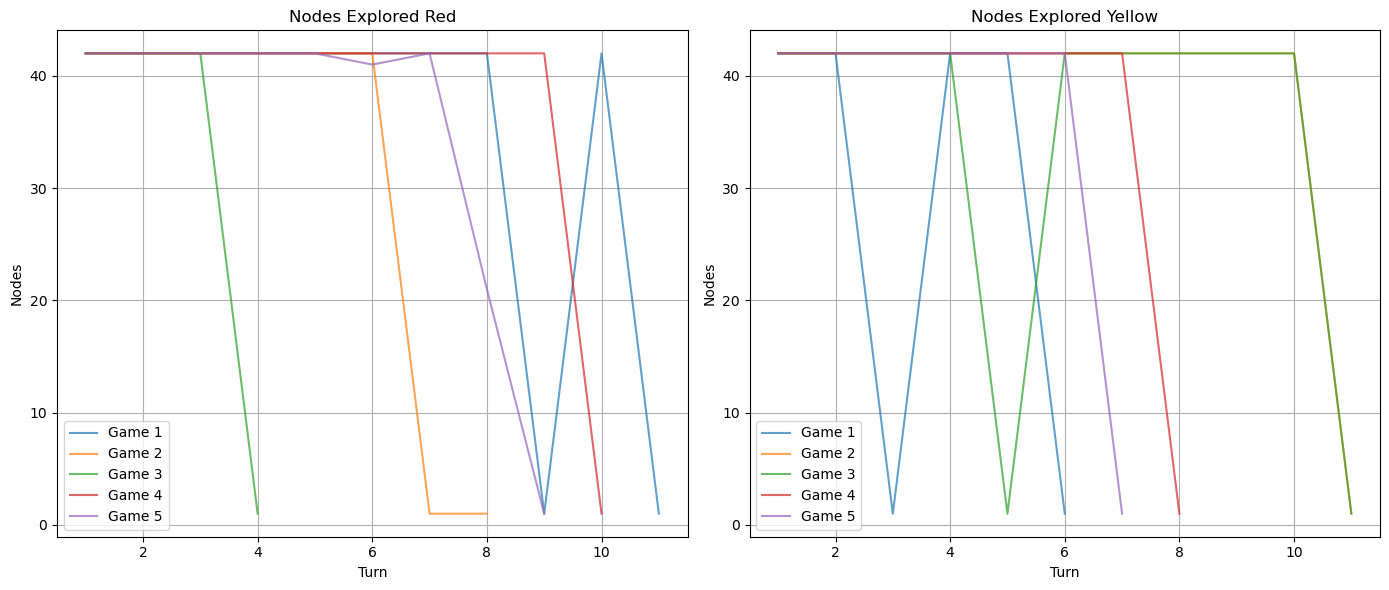

In [15]:
num_games = 5

nodes_red = []
for i in range(num_games):
    print(f"Red game {i+1}/{num_games}")
    nodesturn = play_nodes(
        my_agent, 
        opponent, 
        red=True, 
        seedb=seed + i
    )
    nodes_red.append(nodesturn)

nodes_yellow = []
for i in range(num_games):
    print(f"Yellow game {i+1}/{num_games}")
    nodesturn = play_nodes(
        my_agent, 
        opponent, 
        red=False, 
        seedb=seed + 1000 + i
    )
    nodes_yellow.append(nodesturn)


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i in range(num_games):
    turnos = []
    for j in range(len(nodes_red[i])):
        turnos.append(j + 1)
    
    plt.plot(turnos, nodes_red[i], alpha=0.7, label=f'Game {i+1}')

plt.title("Nodes Explored Red")
plt.xlabel("Turn")
plt.ylabel("Nodes")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(num_games):
    turnos = []
    for j in range(len(nodes_yellow[i])):
        turnos.append(j + 1)
    
    plt.plot(turnos, nodes_yellow[i], alpha=0.7, label=f'Game {i+1}')

plt.title("Nodes Explored Yellow")
plt.xlabel("Turn")
plt.ylabel("Nodes")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()